In [11]:
%matplotlib inline
import numpy as np
import poisson_tools as pt
import matplotlib.pyplot as plt
from scipy.special import expit

In [12]:
train_x, train_y = pt.get_train_data()
train_x = train_x > 50

In [13]:
#pt.plot_digit(train_x[4])

In [14]:
digit = 5
train_num = 100
label_list = np.array(train_y).astype(int)
index_digit = np.where(label_list==digit)[0][0:train_num]
Data_v = np.array(train_x[index_digit]).astype(float)
#print Data_v[0]

# Initialisation of W, a and b

In [15]:
hiden_num = 500
W = np.random.normal(0,0.01,Data_v.shape[1]*hiden_num)
W = W.reshape((Data_v.shape[1],hiden_num))
b = np.zeros(hiden_num)
pixel_on = np.sum(Data_v,0)
a = np.log((pixel_on + 0.01)/(train_num - pixel_on + 0.01))
eta = 0.001

# Given V0, get (v0, h0) and (v1, h1)

In [16]:
def sigmoid_sampling(data, weight, bias):
    sum_data = np.dot(data, weight) + bias
    prob = expit(sum_data)
    rdm = np.random.random(prob.shape)
    index_on = rdm < prob
    samples = np.zeros(prob.shape)
    samples[index_on]=1.
    return samples
    

In [17]:
def update_para(v0, h0, v1, h1, a, b, w, eta ):
    delta_a = np.zeros(w.shape[0])
    delta_b = np.zeros(w.shape[1])
    delta_w = np.zeros(w.shape)
    batch_size = v0.shape[0]
    for k in range(batch_size):
        for i in range(w.shape[0]):
            delta_a[i] = eta * (v0[k][i] - v1[k][i])
        for j in range(w.shape[1]):
            delta_b[j] = eta * (h0[k][j] - h1[k][j])
        for i in range(w.shape[0]):
            for j in range(w.shape[1]):
                delta_w[i][j] += eta * (v0[k][i]*h0[k][j] - v1[k][i]*h1[k][j])
    a += delta_a/batch_size
    b += delta_b/batch_size
    w += delta_w/batch_size
    return a, b, w

In [18]:
batch_size = 1
for ieration in range(100):
    for k in range(0,train_num,batch_size):
        data_v = Data_v[k:k+batch_size]
        data_h = sigmoid_sampling(data_v, W, b)
        gibbs_v = sigmoid_sampling(data_h, W.transpose(), a)
        gibbs_h = sigmoid_sampling(gibbs_v, W, b)
        a, b, W = update_para(data_v, data_h, gibbs_v, gibbs_h, a, b, W, eta)

KeyboardInterrupt: 

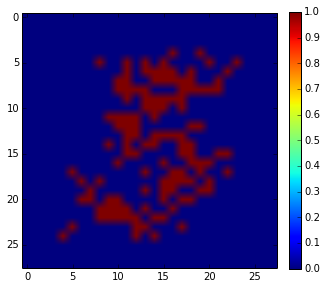

In [27]:
data_v = Data_v[0]
data_h = sigmoid_sampling(data_v, W, b)
recon = sigmoid_sampling(data_h, W.transpose(), a)
pt.plot_digit(recon)

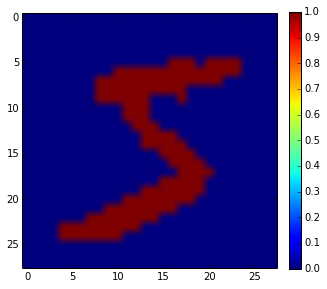

In [28]:
pt.plot_digit(data_v)